<a href="https://colab.research.google.com/github/alfa33333/NN_notebooks/blob/main/QuickCNNTFv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 11s 0us/step


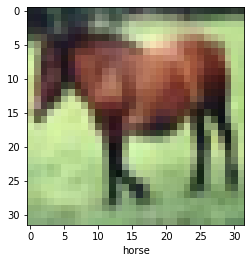

In [3]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, 
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5114 - accuracy: 0.4495 - val_loss: 1.2360 - val_accuracy: 0.5519
Epoch 2/4
1563/1563 [==============================] - 63s 41ms/step - loss: 1.1486 - accuracy: 0.5925 - val_loss: 1.1435 - val_accuracy: 0.5958
Epoch 3/4
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0119 - accuracy: 0.6457 - val_loss: 0.9738 - val_accuracy: 0.6596
Epoch 4/4
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9232 - accuracy: 0.6764 - val_loss: 0.9389 - val_accuracy: 0.6729


In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9389 - accuracy: 0.6729
0.6729000210762024


In [16]:
prediction = model.predict(test_images,verbose=2)

313/313 - 3s


In [23]:
import numpy as np

In [58]:
import matplotlib.pyplot as plt

def plot_image(images, label_true, label_predict):
    fig, axes = plt.subplots(3, 3,figsize=(10,10)) # 3x3 plots

    for i, ax in enumerate(axes.flat):
        # plot image
        ax.imshow(images[i])

        # show true and predicted labels
        if label_predict is None:
            xlabel = "True: {}".format(class_names[label_true[i,0]])
        else:
            xlabel = "True: {}, Predict: {}".format(class_names[label_true[i,0]], class_names[np.argmax(label_predict[i])])

        ax.set_xlabel(xlabel)

    plt.show()

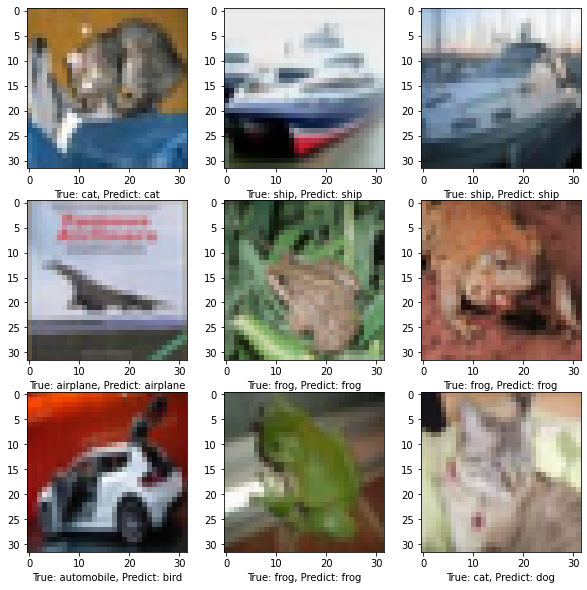

In [59]:
plot_image(test_images,test_labels,prediction)

In [61]:
import glob
import imageio
import os
import PIL
import time

from IPython import display

In [62]:
!pip install d2l==0.14.4

     |████████████████████████████████| 61kB 1.8MB/s 


In [63]:
from d2l import torch as d2l

In [64]:
d2l.DATA_HUB['pokemon'] = (d2l.DATA_URL + 'pokemon.zip',
                           'c065c0e2593b8b161a2d7873e42418bf6a21106c')

data_dir = d2l.download_extract('pokemon')

In [65]:
import pathlib
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

40597


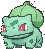

In [66]:
bulbasour = list(data_dir.glob('1/*'))
PIL.Image.open(str(bulbasour[0]))

In [72]:
batch_size = 256
img_height = 32
img_width = 32

In [98]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory( 
#   data_dir,label_mode=None, seed=123, batch_size=batch_size, image_size=(img_height,img_width))
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40597 files belonging to 721 classes.
Using 32478 files for training.


In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40597 files belonging to 721 classes.
Using 8119 files for validation.


In [100]:
class_names = train_ds.class_names
print(class_names)

['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '

In [85]:
def normalize(x):
  x = x / 255.0
  return x

In [86]:
train_dataset = train_ds.map(normalize)

In [92]:
for images in train_dataset.take(1):

  print(images.shape)
  print((images[0]).numpy().astype("uint8").shape)
  print((images[0,:,:,0]).numpy().astype("uint8"))
  # print((images[0,:,:,0]*127.5 + 127.5).numpy().astype("uint8"))

(256, 32, 32, 3)
(32, 32, 3)
[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


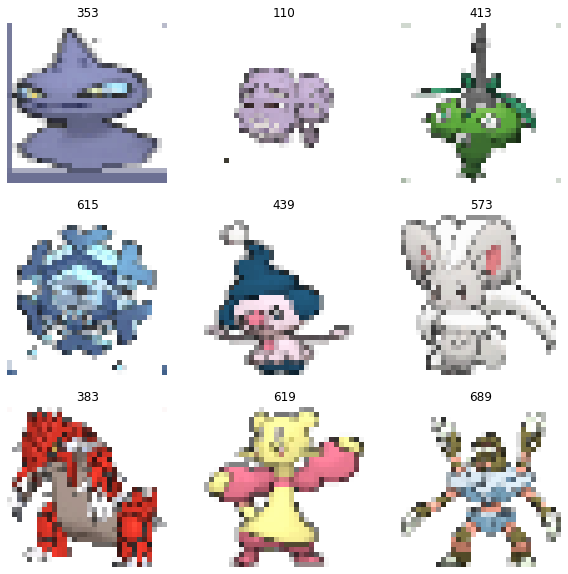

In [101]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [102]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [103]:
numclases = 721

modelp = models.Sequential()
modelp.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
modelp.add(layers.Conv2D(32, (3, 3), activation='relu'))
modelp.add(layers.MaxPooling2D((2, 2)))
modelp.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelp.add(layers.MaxPooling2D((2, 2)))
modelp.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelp.add(layers.Flatten())
modelp.add(layers.Dense(64, activation='relu'))
modelp.add(layers.Dense(numclases))

In [107]:
modelp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [108]:
modelp.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [109]:
history = modelp.fit(train_ds, epochs=10, 
                    validation_data=val_ds)

Epoch 1/10
127/127 [==============================] - 44s 344ms/step - loss: 5.9444 - accuracy: 0.0390 - val_loss: 3.6774 - val_accuracy: 0.2508
Epoch 2/10
127/127 [==============================] - 37s 290ms/step - loss: 1.5208 - accuracy: 0.6657 - val_loss: 0.6406 - val_accuracy: 0.8698
Epoch 3/10
127/127 [==============================] - 37s 290ms/step - loss: 0.4169 - accuracy: 0.9171 - val_loss: 0.3666 - val_accuracy: 0.9340
Epoch 4/10
127/127 [==============================] - 37s 292ms/step - loss: 0.2457 - accuracy: 0.9517 - val_loss: 0.2590 - val_accuracy: 0.9618
Epoch 5/10
127/127 [==============================] - 37s 291ms/step - loss: 0.1615 - accuracy: 0.9699 - val_loss: 0.2263 - val_accuracy: 0.9644
Epoch 6/10
127/127 [==============================] - 37s 290ms/step - loss: 0.1326 - accuracy: 0.9729 - val_loss: 0.1962 - val_accuracy: 0.9698
Epoch 7/10
127/127 [==============================] - 37s 292ms/step - loss: 0.1002 - accuracy: 0.9794 - val_loss: 0.1834 - val_ac

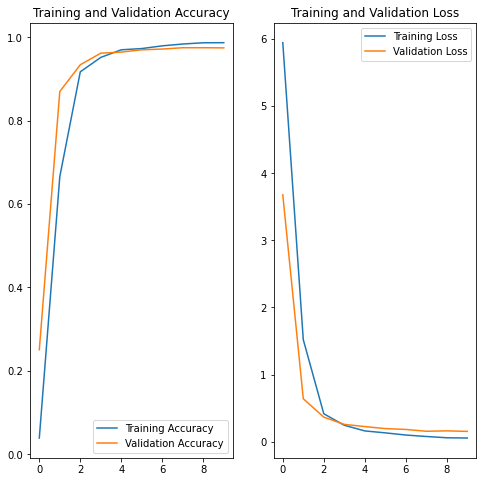

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [134]:
def plot_image2(images, label_true, label_predict):
    fig, axes = plt.subplots(3, 3,figsize=(10,10)) # 3x3 plots

    for i, ax in enumerate(axes.flat):
        # plot image
        ax.imshow(images[i].numpy().astype("uint8"))

        # show true and predicted labels
        if label_predict is None:
            xlabel = "True: {}".format(class_names[label_true[i]])
        else:
            xlabel = "True: {}, Predict: {}".format(class_names[label_true[i]], class_names[np.argmax(label_predict[i])])

        ax.set_xlabel(xlabel)

    plt.show()

8/8 - 0s


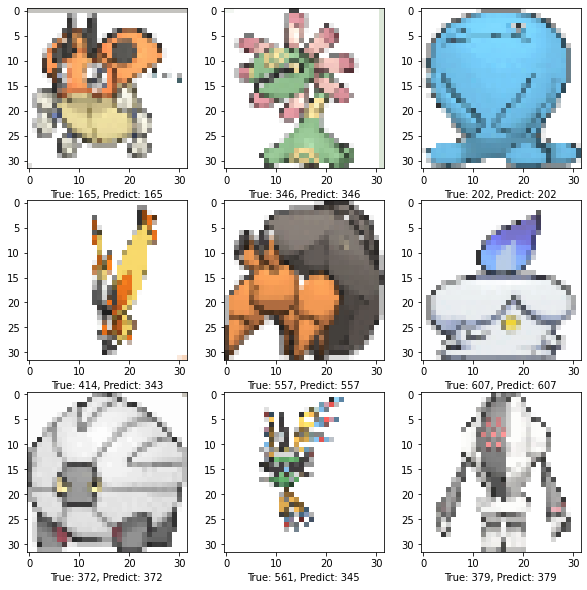

In [137]:
for images, labels in val_ds.take(1):
  prediction2 = modelp.predict(images,verbose=2)
  images2 = images
  labels2 = labels
  plot_image2(images2,labels2,prediction2)